In [1]:
import os
# import drjit
gpu_num = 5 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)
import numpy as np
import pickle
import matplotlib.pyplot as plt
from jammer.utils import NonNegMaxMeanSquareNorm, MaxMeanSquareNorm, reduce_mean_power

In [9]:
# filenames = [
#     'weights/L1 over bit estimates.pickle',
#     'weights/MSE over bit estimates.pickle',
#     'weights/log over bit estimates.pickle',
#     'weights/L1 over symbols.pickle',
#     'weights/MSE over symbols.pickle',
# ]
# shape = [14, 128]

# filenames = [
#     'weights/BCE over bit estimates (logits) symbol_weights.pickle',
#     'weights/L1 over bit estimates symbol_weights.pickle',
#     'weights/L1 over symbols symbol_weights.pickle',
#     'weights/log over bit estimates symbol_weights.pickle',
#     'weights/MSE over bit estimates symbol_weights.pickle',
#     'weights/MSE over symbols symbol_weights.pickle',
# ]
# shape = [14, 1]

# snrs = np.arange(-5, 10.5, 2.5, dtype=np.float32)
# filenames = [f"weights/{ebno_db}db.pickle" for ebno_db in snrs]
# shape = [14, 128]

# snrs = np.arange(-5, 10.5, 2.5, dtype=np.float32)
# filenames = [f"weights/{ebno_db}dB_relufix.pickle" for ebno_db in snrs]
# shape = [14, 128]

# ues = np.arange(1, 5, dtype=np.int32)
# filenames = [f"weights/ue_{ue}_relufix.pickle" for ue in ues]
# filenames += [f"weights/ue_{ue}_constraint.pickle" for ue in ues]
# filenames += [f"weights/ue_{ue}_relufix_constraint.pickle" for ue in ues]
# shape = [14, 128]

# snrs = np.arange(-2.5, 10.5, 2.5, dtype=np.float32)
# filenames = [f"weights/ue_4_{ebno_db}dB.pickle" for ebno_db in snrs]
# shape = [14, 1]

filenames = ["weights/ue_4_relufix_symbol_weights.pickle"]

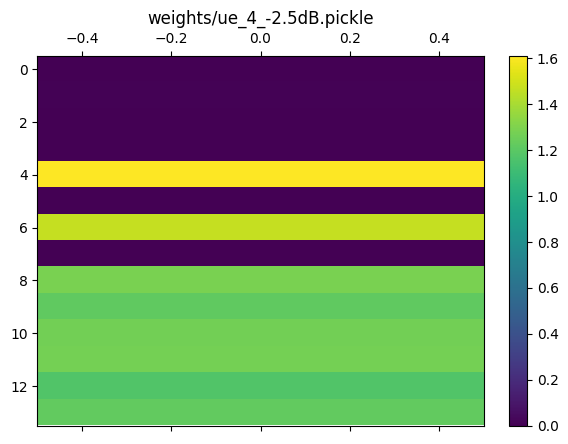

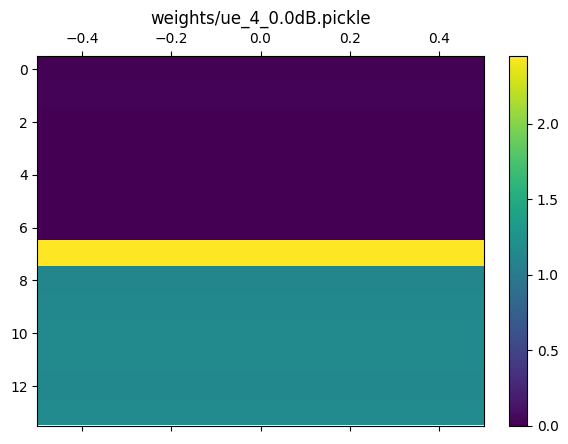

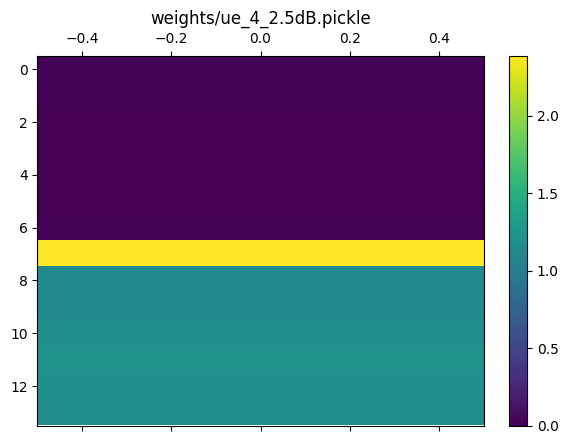

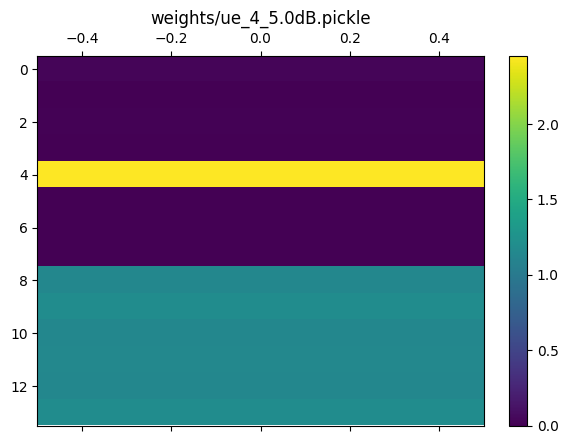

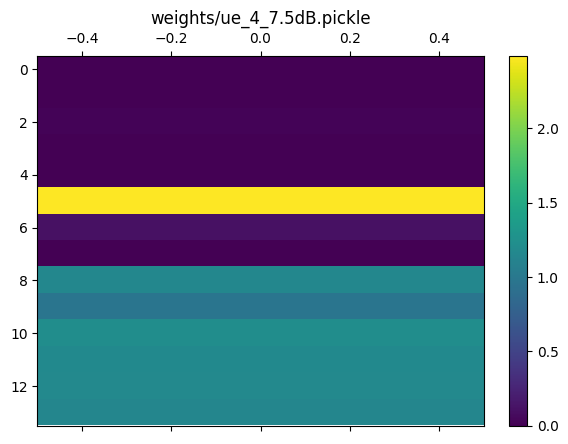

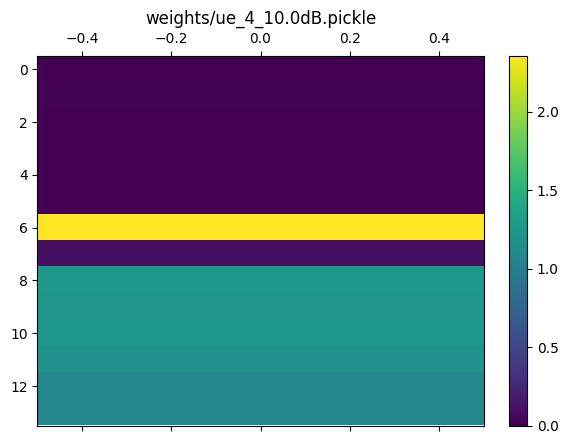

In [7]:
for filename in filenames:
    with open(filename, 'rb') as f:
        data = pickle.load(f)[0]
        data = np.reshape(data, shape)
        # weights are in domain MaxMeanSquareNorm, but we want to only see the absolute values
        data = NonNegMaxMeanSquareNorm()(data)
        fig, ax = plt.subplots()
        im = ax.matshow(data, aspect='auto')
        ax.set_title(filename)
        fig.colorbar(im, fraction=0.05)